In [2]:
from IPython.display import display, HTML
import ipywidgets as widgets
from ipywidgets import Layout
import json
import sys
import os
import subprocess

# Prompt Generation
Edit the File ``prompt_config.json`` to change the prompt generation parameters. The file contains the following parameters:


In [3]:
import src.genPrompt as genPrompt

def check_config(config_file):
    buttonRunGenPrompt.layout.border = '1px solid black'
    buttonCheckConfig.layout.border = '2px solid red'
    output.clear_output()
    with open(config_file) as f:
        config = json.load(f)
    with output:
        print(json.dumps(config, indent=4))

    # get count of prompts
    prompts = genPrompt.generate_prompts_from_json(config)
    promptCount = len(prompts)
    textPromptCount.value = str(promptCount)

def run_gen_prompt(config_file):
    output.clear_output()
    buttonRunGenPrompt.layout.border = '2px solid red'
    buttonCheckConfig.layout.border = '1px solid black'
    with output:
        # run genPrompt
        command = f"python ./src/genPrompt.py {config_file}"
        print(f"running: {command}")
        os.system(command)
        

textfield = widgets.Text(value='prompt_config.json', description='Config file:', disabled=False)

# check config button
buttonCheckConfig = widgets.Button(description="Check config")
buttonCheckConfig.on_click(lambda b: check_config(textfield.value))

# run button
buttonRunGenPrompt = widgets.Button(description="Run genPrompt")
buttonRunGenPrompt.on_click(lambda b: run_gen_prompt(textfield.value))

# prompt count
textPromptCountDesc = widgets.HTML(value="Prompt count (Images per Class):")
textPromptCount = widgets.HTML(value="0")
texPromptCountHbox = widgets.HBox([textPromptCountDesc, textPromptCount])

# output
heading = widgets.HTML(value="<h2>Output</h2>")
output = widgets.Output()
output.layout = {'border': '1px solid black'}

# run genPrompt container

buttonHbox = widgets.HBox([buttonCheckConfig, buttonRunGenPrompt])
display(textfield, buttonHbox, texPromptCountHbox, heading ,output)

Text(value='prompt_config.json', description='Config file:')

HTML(value='<h2>Output</h2>')

Output(layout=Layout(border_bottom='1px solid black', border_left='1px solid black', border_right='1px solid b…

# Dataset Generation

In [4]:
from IPython.display import display, HTML
import ipywidgets as widgets

checkboxStates = {
    'Generate Dataset': False,
    'Segmentation': False,
    'Dataset': False,
    'CNN Training': False
}
def on_run_button_clicked(b):
    # clear print output
    # print the selected values
    output.clear_output()
    with output:
        print("Selected values:")
        print(f"  Dataset Name: {datasetName.value}")
        print(f"  Prompt Config: {promptConfig.value}")
        print(f"  {checkboxStates}")

        # get checkbox values
        checkboxArguments = ""
        for key, value in checkboxStates.items():
            if key == 'Generate Dataset':
                if value:
                    checkboxArguments += "--generateDataset True "
                else:
                    checkboxArguments += "--generateDataset False "
            elif key == 'Segmentation':
                if value:
                    checkboxArguments += "--segmentateImages True "
                else:
                    checkboxArguments += "--segmentateImages False "
            elif key == 'prepare Trainings Dataset':
                if value:
                    checkboxArguments += "--createTrainingDataset True "
                else:
                    checkboxArguments += "--createTrainingDataset False "
        # run script
        command = f"start cmd /k python generateDataset.py --datasetName {datasetName.value} --promptConfig {promptConfig.value} {checkboxArguments}"
        print(f"\nExecuting command: {command}")
        os.system(command)

def on_checkbox_change(change):
    checkboxStates[change.owner.description] = change.new

# Create a text widget for datasetName
datasetName = widgets.Text(
    value='urinal_Dataset_v1',
    description='Dataset Name:',
    disabled=False,
    layout=Layout(width='auto')  # Set the width to 'auto'
)
# Create a text widget for promptConfig
promptConfig = widgets.Text(
    value='prompt_config.json',
    description='Prompt Config:',
    disabled=False,
    layout=Layout(width='auto')  # Set the width to 'auto'
)
# combine the two text widgets into a VBox
textWidgets = widgets.VBox([datasetName, promptConfig])

# select multiple values
checkboxGenerateDataset = widgets.Checkbox(value=False, description='Generate Dataset')
checkboxGenerateDataset.observe(on_checkbox_change, names='value')
checkboxSegmentation = widgets.Checkbox(value=False, description='Segmentation')
checkboxSegmentation.observe(on_checkbox_change, names='value')
checkboxDateset = widgets.Checkbox(value=False, description='prepare Trainings Dataset')
checkboxDateset.observe(on_checkbox_change, names='value')

checkboxCNNTraining = widgets.Checkbox(value=False, description='CNN Training', disabled=True)
checkboxCNNTraining.observe(on_checkbox_change, names='value')

checkboxes = widgets.VBox([checkboxGenerateDataset, checkboxSegmentation, checkboxDateset, checkboxCNNTraining])

# Create a button widget to run code
button = widgets.Button(description="Run", button_style='success')
button.on_click(on_run_button_clicked)

# combine the checkboxes and button into a HBox
hbox = widgets.HBox([textWidgets, checkboxes, button])


# create output widget
outputTitle = widgets.HTML(value="<h2>Output</h2>")
output = widgets.Output()
output.layout = {
    'border': '1px solid black',
    'overflow_y': 'auto',  # Add a vertical scrollbar in case of overflow
}
outputVbox = widgets.VBox([outputTitle, output])

display(hbox, outputVbox)


# CNN Model Training

In [5]:
import ipywidgets as widgets
from IPython.display import display
import subprocess

def get_datasets_from_folder(folder):
    return [name for name in os.listdir(folder) if os.path.isdir(os.path.join(folder, name))]

def on_run_button_clicked(b):

    output.clear_output()
    
    # Get widget values
    dataset = dataset_widget.value
    model = model_widget.value
    model_selection = model_selection_widget.value
    if model_selection == 'fine-tuning':
        model_selection = '1'
    else:
        model_selection = '2'

    # run script
    with output:
        command = f"start cmd /k python ./src/trainCNN/trainCNN.py --dataset {dataset} --model {model} --modelSelection {model_selection}"
        print(f"\nExecuting command: {command}")
        os.system(command)

# Create widgets
#dataset_widget = widgets.Text(description='Dataset', value='urinal_v2')
dataset_widget = widgets.Dropdown(description='Dataset', options=get_datasets_from_folder('./datasets'))
model_widget = widgets.Dropdown(description='Model', options=['inception_v3', 'resnet50'])
model_selection_widget = widgets.Dropdown(description='Model Selection', options=['fine-tuning', 'feature-extraction'])

run_button = widgets.Button(description="Run", button_style='success')

outputTitle = widgets.HTML(value="<h2>Output</h2>")
output = widgets.Output()
output.layout = {
    'border': '1px solid black',
    'overflow_y': 'auto',  # Add a vertical scrollbar in case of overflow
}

# Display widgets
display(dataset_widget, model_widget, model_selection_widget, run_button, outputTitle, output)

run_button.on_click(on_run_button_clicked)



Dropdown(description='Dataset', options=('urinal_Dataset_v12', 'urinal_Dataset_v12_seg', 'urinal_Dataset_v13',…

Dropdown(description='Model', options=('inception_v3', 'resnet50'), value='inception_v3')

Dropdown(description='Model Selection', options=('fine-tuning', 'feature-extraction'), value='fine-tuning')

Button(button_style='success', description='Run', style=ButtonStyle())

HTML(value='<h2>Output</h2>')

Output(layout=Layout(border_bottom='1px solid black', border_left='1px solid black', border_right='1px solid b…

# Evaluation

In [50]:
import ipywidgets as widgets
from IPython.display import display
import subprocess

def get_datasets_from_folder(folder):
    return [name for name in os.listdir(folder) if os.path.isdir(os.path.join(folder, name))]

def on_run_button_clicked(b):
    output.clear_output()
    
    # Get widget values
    trainingFolder = trainingFolderWidget.value
    modelPath = os.path.join('./trainingOutput', trainingFolder, 'best_model.pth')

    # run script
    with output:
        command = f"start cmd /k python ./src/trainCNN/validateCNN.py --model_path {modelPath}"
        print(f"\nExecuting command: {command}")
        os.system(command)

# Create widgets
#dataset_widget = widgets.Text(description='Dataset', value='urinal_v2')
trainingFolderWidget = widgets.Dropdown(description='Trainings', options=get_datasets_from_folder('./trainingOutput'))

run_button = widgets.Button(description="Run", button_style='success')

outputTitle = widgets.HTML(value="<h2>Output</h2>")
output = widgets.Output()
output.layout = {
    'border': '1px solid black',
    'overflow_y': 'auto',  # Add a vertical scrollbar in case of overflow
}

# Display widgets
display(trainingFolderWidget, run_button, outputTitle, output)

run_button.on_click(on_run_button_clicked)



Dropdown(description='Trainings', options=('2024-05-03_11-24-09', '2024-05-04_14-43-26_urinal_v2_resnet50_fav'…

Button(button_style='success', description='Run', style=ButtonStyle())

HTML(value='<h2>Output</h2>')

Output(layout=Layout(border_bottom='1px solid black', border_left='1px solid black', border_right='1px solid b…

# Plotting


In [19]:
# dropdown widget

# dropdown on change function
def on_change(change):
    if change['type'] == 'change' and change['name'] == 'value':
        with output:
            output.clear_output()
            print(f"Selected dataset: {change['new']}")

        # display the selected dataset
        dataset = change['new']
        dataset_path = f"./trainingOutput/{dataset}"
        # display accuracy plot
        accuracy_plot = f"{dataset_path}/images-plots/plots/Accuracy_plot.png"
        # check if file exists, use output widget to display image
        if os.path.isfile(accuracy_plot):
            with output:
                display(HTML(f'<img src="{accuracy_plot}">'))
        else:
            with output:
                print(f"Accuracy plot not found: {accuracy_plot}")

# get all folder in training folder and use them as options
def get_datasets_from_folder(folder):
    return [name for name in os.listdir(folder) if os.path.isdir(os.path.join(folder, name))]
# Create a dropdown widget
dropdown = widgets.Dropdown(
    options=get_datasets_from_folder('./trainingOutput'),
    description='Dataset:',
    disabled=False,
)
dropdown.observe(on_change)

# Create a button widget to run code
button = widgets.Button(description="Run", button_style='success')

# Create an output widget
output = widgets.Output()
output.layout = {
    'border': '1px solid black',
    'overflow_y': 'auto',  # Add a vertical scrollbar in case of overflow
}

# display widgets
display(dropdown, button, output)

Dropdown(description='Dataset:', options=('2024-05-03_11-24-09', '2024-05-04_14-43-26_urinal_v2_resnet50_fav',…

Button(button_style='success', description='Run', style=ButtonStyle())

Output(layout=Layout(border_bottom='1px solid black', border_left='1px solid black', border_right='1px solid b…

# Testing

init writer
dict_keys(['Learning Rate', 'Accuracy_Test', 'Accuracy_Train', 'Loss_Test', 'Loss_Train', 'Precision_Test', 'Precision_Train', 'Recall_Test', 'Recall_Train'])


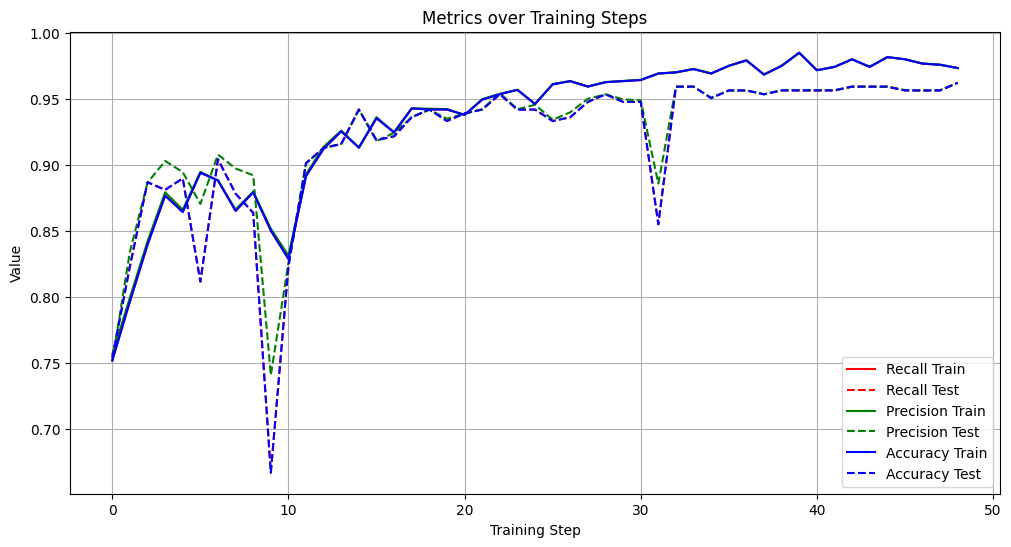

In [38]:
import src.trainCNN.tensorboardHandler as tbh

tbRoot = r"D:\code\Bachelorarbeit\xx_code_BA\trainingOutput\2024-06-07_21-40-04_urinal_Dataset_v14_seg_inception_v3_FT_finished_EP-42_ACC-0.9594_LOSS-0.0916"
tbh = tbh.TensorBoard(tbRoot)

metrics = tbh.extract_tensorboard_metrics()

print(metrics.keys())

accuracy_train = metrics['Accuracy_Train']
accuracyTest = metrics['Accuracy_Test']
precision_train = metrics['Precision_Train']
precision_test = metrics['Precision_Test']
recall_train = metrics['Recall_Train']
recall_test = metrics['Recall_Test']

#print(accuracy_train)
# combine all metrics into a single plot, use the same x-axis, different color for each metric, but same color for train and test
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(recall_train['Step'], recall_train['Value'], label='Recall Train', color='red')
plt.plot(recall_test['Step'], recall_test['Value'], label='Recall Test', color='red', linestyle='dashed')
plt.plot(precision_train['Step'], precision_train['Value'], label='Precision Train', color='green')
plt.plot(precision_test['Step'], precision_test['Value'], label='Precision Test', color='green', linestyle='dashed')
plt.plot(accuracy_train['Step'], accuracy_train['Value'], label='Accuracy Train', color='blue')
plt.plot(accuracyTest['Step'], accuracyTest['Value'], label='Accuracy Test', color='blue', linestyle='dashed')

plt.xlabel('Training Step')
plt.ylabel('Value')
plt.title('Metrics over Training Steps')
plt.grid()

plt.legend()

plt.show()


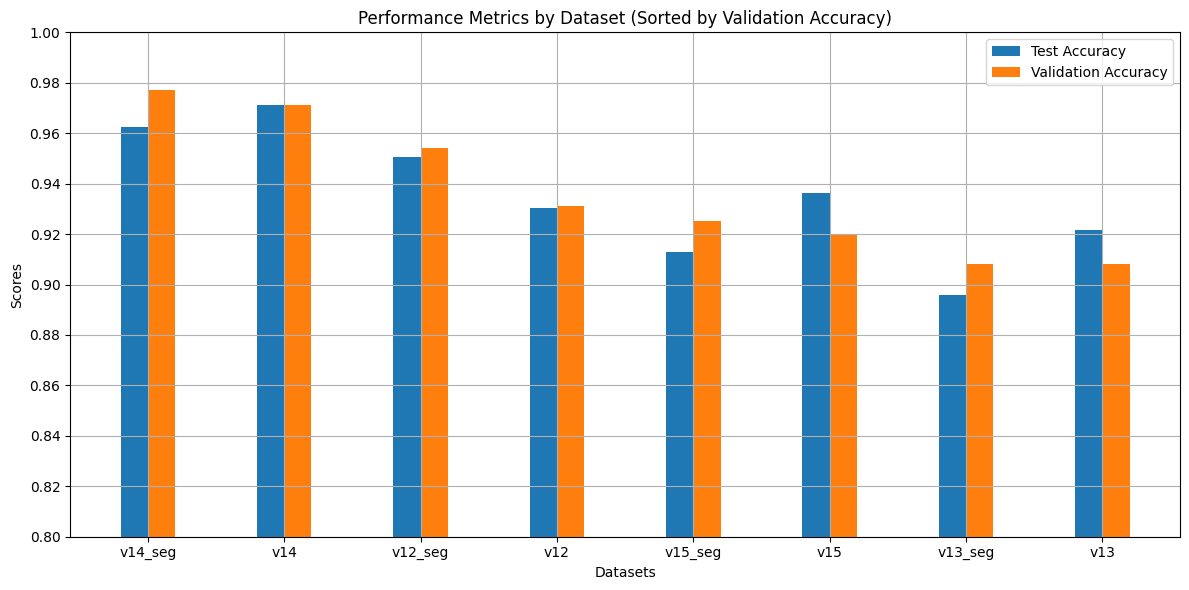

In [82]:
import matplotlib.pyplot as plt
import numpy as np

# Daten
datasets = ["v12", "v12_seg", "v13", "v13_seg", "v14", "v14_seg", "v15", "v15_seg"]
test_accuracy = [0.9304, 0.9507, 0.9217, 0.8957, 0.9710, 0.9623, 0.9362, 0.9130]
test_recall = [0.9304, 0.9507, 0.9217, 0.8957, 0.9710, 0.9623, 0.9362, 0.9130]
test_precision = [0.9300, 0.9520, 0.9293, 0.8961, 0.9711, 0.9624, 0.9363, 0.9127]
val_accuracy = [0.9310, 0.9540, 0.9080, 0.9080, 0.9713, 0.9770, 0.9195, 0.9253]
val_recall = [0.9310, 0.9540, 0.9080, 0.9080, 0.9713, 0.9770, 0.9195, 0.9253]
val_precision = [0.9305, 0.9538, 0.9091, 0.9091, 0.9735, 0.9770, 0.9352, 0.9317]

# Sortieren nach Validation Accuracy
sorted_indices = np.argsort(val_accuracy)[::-1]  # Absteigend sortieren
sorted_datasets = [datasets[i] for i in sorted_indices]
sorted_test_accuracy = [test_accuracy[i] for i in sorted_indices]
sorted_val_accuracy = [val_accuracy[i] for i in sorted_indices]
sorted_test_recall = [test_recall[i] for i in sorted_indices]
sorted_val_recall = [val_recall[i] for i in sorted_indices]
sorted_test_precision = [test_precision[i] for i in sorted_indices]
sorted_val_precision = [val_precision[i] for i in sorted_indices]

x = np.arange(len(datasets))/2  # Label-Standorte
width = 0.1  # Breite der Balken

fig, ax = plt.subplots(figsize=(12, 6))

rects1 = ax.bar(x - 1/2*width, sorted_test_accuracy, width, label='Test Accuracy')
rects4 = ax.bar(x + 1/2*width, sorted_val_accuracy, width, label='Validation Accuracy')

# Labels und Titel
ax.set_xlabel('Datasets')
ax.set_ylabel('Scores')
ax.set_title('Performance Metrics by Dataset (Sorted by Validation Accuracy)')
ax.set_ylim(0.85, 1)
ax.set_xticks(x)
ax.set_xticklabels(sorted_datasets)
ax.set_yticks(np.arange(0.80, 1.01, 0.02))
ax.grid()

ax.legend()
fig.tight_layout()
plt.show()
